# Part 2: Subreddit EDA Analysis
In this phase, we will use the data collected in Part 1 and perform preliminary EDA to understand the data. Is it balanced? Can we see discrepancies between the subreddits, what are they? What some of the key words and phrases used?

**Import Packages**

In [88]:
import pandas as pd
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from sklearn.feature_extraction.text import CountVectorizer

## 2.1. Preview Data

In [89]:
df = pd.read_csv("../data/women_men.csv")

In [90]:
df.head(3)

,Unnamed: 0,id,subreddit,created_utc,is_video,spoiler,is_self,score,is_original_content,is_created_from_ads_ui,...,selftext,all_text,title_length,selftext_length,all_text_length,title_words,selftext_words,all_text_words,no_links_text,contains_link
0,0,n4c2kk,AskWomen,2021-05-03 20:48:28,False,False,True,1,False,NaN,...,NaN,What is a fragrance you love or you get a lot ...,64,0,65,14,0,14,What is a fragrance you love or you get a lot ...,0
1,1,n4c0tz,AskWomen,2021-05-03 20:46:05,False,False,True,1,False,NaN,...,NaN,Women of reddit (I'm sorry if this has been as...,123,0,124,20,0,20,Women of reddit (I'm sorry if this has been as...,0
2,2,n4bymt,AskWomen,2021-05-03 20:42:50,False,False,True,1,False,NaN,...,NaN,What is this called? What is going on? Is this...,54,0,55,11,0,11,What is this called? What is going on? Is this...,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              20000 non-null  int64 
 1   id                      20000 non-null  object
 2   subreddit               20000 non-null  object
 3   created_utc             20000 non-null  object
 4   is_video                20000 non-null  bool  
 5   spoiler                 20000 non-null  bool  
 6   is_self                 20000 non-null  bool  
 7   score                   20000 non-null  int64 
 8   is_original_content     20000 non-null  bool  
 9   is_created_from_ads_ui  10078 non-null  object
 10  media_only              20000 non-null  bool  
 11  over_18                 20000 non-null  bool  
 12  num_comments            20000 non-null  int64 
 13  num_crossposts          20000 non-null  int64 
 14  author                  20000 non-null  object
 15  au

In [92]:
df.describe()

,Unnamed: 0,score,num_comments,num_crossposts,title_length,selftext_length,all_text_length,title_words,selftext_words,all_text_words,contains_link
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,4999.500000,3.740200,18.037100,0.000600,69.504000,49.412700,119.916700,13.165350,9.406600,22.57195,0.001650
std,2886.823503,147.444395,141.262419,0.043586,40.279557,207.680123,211.724671,7.598157,39.630531,40.42861,0.040588
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.00000,0.000000
25%,2499.750000,1.000000,1.000000,0.000000,42.000000,0.000000,47.000000,8.000000,0.000000,9.00000,0.000000
50%,4999.500000,1.000000,2.000000,0.000000,61.000000,0.000000,70.000000,12.000000,0.000000,13.00000,0.000000
75%,7499.250000,1.000000,6.000000,0.000000,87.000000,0.000000,109.000000,16.000000,0.000000,20.00000,0.000000
max,9999.000000,14201.000000,8176.000000,5.000000,305.000000,5325.000000,5422.000000,68.000000,1006.000000,1025.00000,1.000000


In [93]:
df.shape

(20000, 27)

Is the dataset balanced? What is the division of data between subreddits?

In [94]:
df.subreddit.value_counts(normalize=True)

AskWomen    0.5
AskMen      0.5
Name: subreddit, dtype: float64

In [95]:
sub1 = df.subreddit.unique()[0]
sub2 = df.subreddit.unique()[1]

In [96]:
df.author.value_counts().sort_values(ascending=False).head(5)

[deleted]            1523
SkepticDrinker         39
notdatsrs              27
RandomlyGenerate5      27
corona_coaster         24
Name: author, dtype: int64

In [97]:
df = df[df['author']!="AutoModerator"]
df = df[df['author']!="splat_bot"]
df.shape

(19988, 27)

In [98]:
df.subreddit.value_counts()

AskMen      10000
AskWomen     9988
Name: subreddit, dtype: int64

In [99]:
df

,Unnamed: 0,id,subreddit,created_utc,is_video,spoiler,is_self,score,is_original_content,is_created_from_ads_ui,...,selftext,all_text,title_length,selftext_length,all_text_length,title_words,selftext_words,all_text_words,no_links_text,contains_link
0,0,n4c2kk,AskWomen,2021-05-03 20:48:28,False,False,True,1,False,NaN,...,NaN,What is a fragrance you love or you get a lot ...,64,0,65,14,0,14,What is a fragrance you love or you get a lot ...,0
1,1,n4c0tz,AskWomen,2021-05-03 20:46:05,False,False,True,1,False,NaN,...,NaN,Women of reddit (I'm sorry if this has been as...,123,0,124,20,0,20,Women of reddit (I'm sorry if this has been as...,0
2,2,n4bymt,AskWomen,2021-05-03 20:42:50,False,False,True,1,False,NaN,...,NaN,What is this called? What is going on? Is this...,54,0,55,11,0,11,What is this called? What is going on? Is this...,0
3,3,n4bws7,AskWomen,2021-05-03 20:40:11,False,False,True,1,False,NaN,...,NaN,Saw a post asking what's the most inappropriat...,193,0,194,32,0,32,Saw a post asking what's the most inappropriat...,0
4,4,n4bumy,AskWomen,2021-05-03 20:37:05,False,False,True,1,False,NaN,...,NaN,What What What What,19,0,20,4,0,4,What What What What,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,9995,o2bqa8,AskMen,2021-06-17 20:06:41,False,False,True,1,False,False,...,NaN,"Dear men, how do you end up marrying the “wron...",55,0,56,11,0,11,"Dear men, how do you end up marrying the “wron...",0
19996,9996,o2bodj,AskMen,2021-06-17 20:03:51,False,False,True,0,False,False,...,NaN,Why is/isn’t racial exclusivity problematic in...,73,0,74,9,0,9,Why is/isn’t racial exclusivity problematic in...,0
19997,9997,o2blna,AskMen,2021-06-17 20:00:12,False,False,True,1,False,False,...,NaN,Question,8,0,9,1,0,1,Question,0
19998,9998,o2bjdz,AskMen,2021-06-17 19:57:05,False,False,True,4,False,False,...,NaN,[NSFW] How can I come back to cumming as normal?,48,0,49,10,0,10,[NSFW] How can I come back to cumming as normal?,0


## 2.2. Functions to Facilitate EDA

### Functions for Text Handling

In [100]:
#Function to get Count Vectorized dataframe output of the dataframe
def get_cv(df, text_col, stop_words, min_df, ngram_range):
    cv = CountVectorizer(stop_words=stop_words,
                         ngram_range = ngram_range,
                         min_df= min_df)
    cv.fit(df[text_col])
    cv_text = cv.transform(df[text_col])
    df_cv = pd.DataFrame(cv_text.todense(),columns=cv.get_feature_names())
    df = df.rename(columns={"subreddit": "subreddit_target",
                            "title": "subreddit_title",
                            'score': 'subreddit_score',
                            'spoiler':'subreddit_spoiler',
                            'author':'subreddit_author',
                            "id": "subbreddit_id"})
    data = pd.merge(df, df_cv, left_index=True, right_index=True).drop(columns=['Unnamed: 0'])
    return data

#Function to return the name of all word columns
def get_words(df, text_col, stop_words, min_df, ngram_range):
    cv = CountVectorizer(stop_words=stop_words,
                         ngram_range = ngram_range,
                         min_df= min_df)
    cv.fit(df[text_col])
    cv_text = cv.transform(df[text_col])
    df_cv = pd.DataFrame(cv_text.todense(),columns=cv.get_feature_names())
    cols = [col for col in df_cv]
    return cols

#Function to return the top text (words or phrases) in a dataframe
def get_top_text(df, target, text_cols, top_n):
    #aggregate and flip
    data = (df[['subreddit_target']+text_cols]
            .groupby('subreddit_target')
            .sum().T[target])
    #filter out words in remove list
    remove_list = ['ve','com','nt','https']
    data = data[data.index.isin(remove_list)==False]
    data = data[data.index.str.contains("com")==False]
    #sort and return top values
    data = data.sort_values(ascending=False).head(top_n)
    return pd.DataFrame(data)

### Functions for Plotting

In [101]:
def dist_facet(df, feature, x_label, title):
    plot = (ggplot(df, aes(x=feature, fill="subreddit"))
                +geom_histogram() 
                +facet_wrap("subreddit",scales="free_y")
                +scale_fill_manual(values = [col1,col2], guide=None)
                + xlab(x_label)
                + ylab("Count")
                +ggtitle(title)
                +theme(figure_size=(12, 4),
                    text = element_text(family="Gill Sans"),
                    plot_title=element_text(weight='bold',color='black', size=16),
                    panel_background = element_rect(fill="white"),
                    panel_grid_major = element_line(color="#dee2e6"),
                    subplots_adjust={'wspace': 0.25},
                    legend_position="none",
                    axis_title = element_text(weight='bold'))
          )
    return plot

def dist_overlay(df, feature, x_label, title):
    plot = (ggplot(df, aes(x=feature, fill="subreddit"))
                +geom_histogram() 
                +scale_fill_manual(values = [col1,col2], guide=guide_legend(title="Subreddit"))
                + xlab(x_label)
                + ylab("Count")
                +ggtitle(title)
                +theme(figure_size=(8, 4),
                    text = element_text(family="Gill Sans"),
                    plot_title=element_text(weight='bold',color='black', size=16),
                    panel_background = element_rect(fill="white"),
                    panel_grid_major = element_line(color="#dee2e6"),
                    subplots_adjust={'wspace': 0.25},
                    legend_position="right",legend_box_spacing=.25,
                    axis_title = element_text(weight='bold'))
          )
    return plot

In [162]:
#set EDA color aesthetic
col1 = '#4499B9'
col2 = '#D42E76'

In [166]:
words = get_cv(df, 'no_links_text', 'english', 2, (1,2))
word_list = get_words(df, 'no_links_text', 'english', 2, (1,2))

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [167]:
text_words = (words[['subreddit_target']+word_list]
            .groupby('subreddit_target')
            .sum().T)

text_words = text_words.rename(columns={'AskMen':'askmen_word_count',
                        'AskWomen':'askwomen_word_count'})
text_posts = words[word_list]
text_posts[text_posts > 1] = 1
text_posts['subreddit_target'] = words['subreddit_target'] 
text_posts = (text_posts[['subreddit_target']+word_list]
            .groupby('subreddit_target')
            .sum().T)

text_df = pd.merge(text_posts,text_words, left_index=True, right_index=True).rename(columns={'AskWomen':'askwomen_post_count',
                        'AskMen':'askmen_post_count'})

text_df = text_df.reset_index().rename(columns={'index':'word'})
text_df
text_df.to_csv("../data/text_df_nostops.csv",index=False)


/var/folders/_t/499y92214db5rwqx_4lz2fk80000gn/T/ipykernel_24788/1645968643.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/_t/499y92214db5rwqx_4lz2fk80000gn/T/ipykernel_24788/1645968643.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

## 2.3. Distributions

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../plots/dist_all_words.png
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 480'. Pick better value with 'binwidth'.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 480'. Pick better value with 'binwidth'.


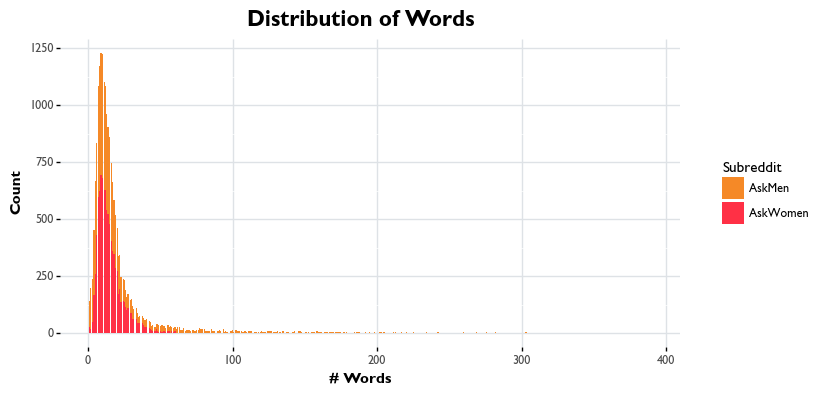

<ggplot: (8773122581773)>

In [104]:
dist_all_words = dist_overlay(df[df.all_text_words<400], "all_text_words", "# Words", "Distribution of Words")

ggsave(plot=dist_all_words, filename='../plots/dist_all_words.png', dpi=1000)

dist_all_words

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../plots/dist_title_length.png
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 92'. Pick better value with 'binwidth'.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 92'. Pick better value with 'binwidth'.


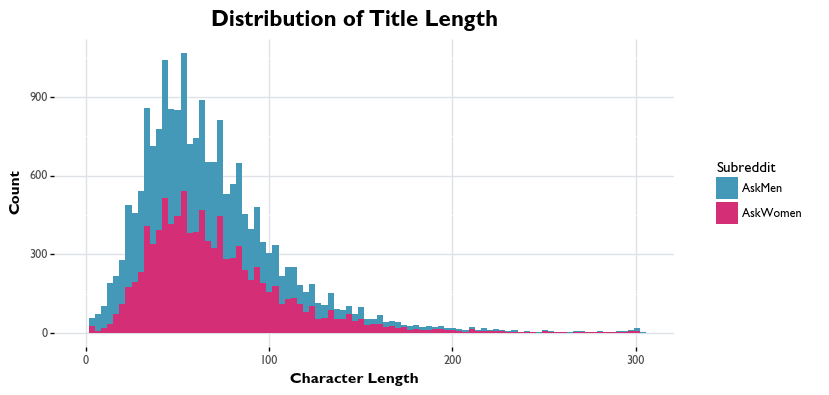

<ggplot: (8773973184028)>

In [163]:
dist_title_len = dist_overlay(df, "title_length", "Character Length", "Distribution of Title Length")

ggsave(plot=dist_title_len, filename='../plots/dist_title_length.png', dpi=1000)

dist_title_len

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 8 x 4 in image.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../plots/dist_title_length.png
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 114'. Pick better value with 'binwidth'.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 114'. Pick better value with 'binwidth'.


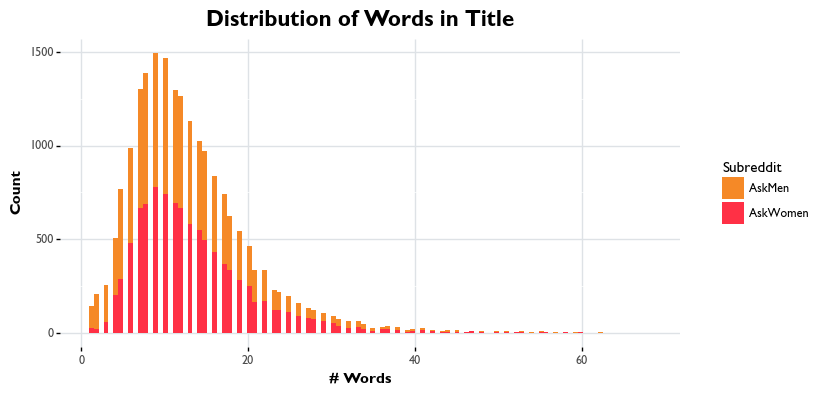

<ggplot: (8773122448797)>

In [106]:
dist_title_words = dist_overlay(df, "title_words", "# Words", "Distribution of Words in Title")

ggsave(plot=dist_title_words, filename='../plots/dist_title_length.png', dpi=1000)

dist_title_words

## 2.4. Text Analysis

### Popular Words

In [107]:
words = get_cv(df, 'no_links_text', 'english', 2, (1,1))
word_list = get_words(df, 'no_links_text', 'english', 2, (1,1))

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [108]:
#popular words for subreddit 1
top_words_sub1 = get_top_text(words, sub1, word_list, 15).rename(columns={sub1:"count"})
top_words_sub1 = top_words_sub1.reset_index().rename(columns={"index":"word"})
top_words_sub1['subreddit'] = sub1

#popular words for subreddit 2
top_words_sub2 = get_top_text(words, sub2, word_list, 15).rename(columns={sub2:"count"})
top_words_sub2 = top_words_sub2.reset_index().rename(columns={"index":"word"})
top_words_sub2['subreddit'] = sub2

#combine data
top_words = pd.concat([top_words_sub1,top_words_sub2]).sort_values(by=['subreddit','count'], ascending=False)
top_words= top_words.reset_index()

#are there common words included in both
top_words['shared'] = np.where(top_words.duplicated(subset="word", keep=False),"Shared Word","")

#used to help properly sort words/phrases in plotnine, reorders shared words/phrases, workaround
top_words['fake_suffix'] = np.where(top_words.subreddit == sub1, ""," ")

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 12 x 4 in image.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../plots/top_words.png


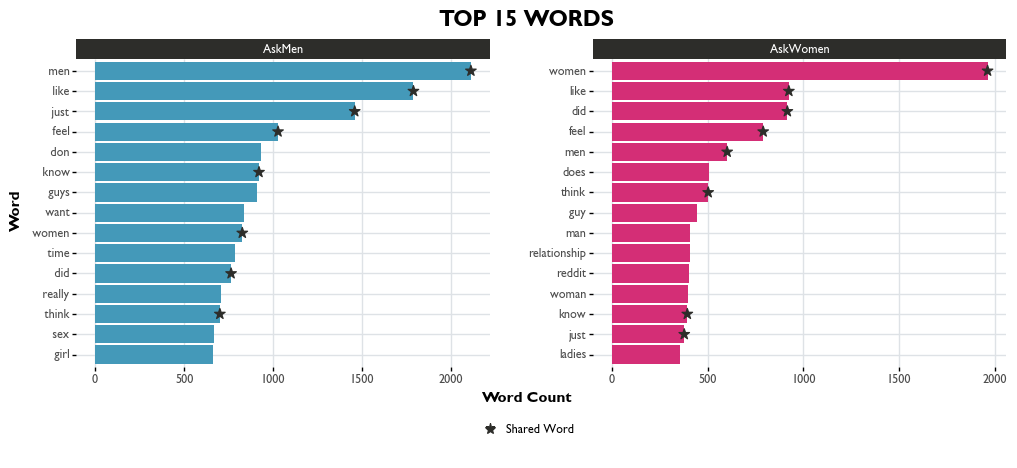

<ggplot: (8773122585239)>

In [164]:
top_words_plot = (
    ggplot(top_words, aes(y= "count", x= "reorder(fake_suffix+word,count)", fill='subreddit'))
        + geom_bar(stat = "identity")
        + geom_point(data = top_words[top_words.shared=="Shared Word"], 
                     mapping=aes(y="count", x="fake_suffix+word",shape="shared"), 
                     color='#2D2D2A', fill="#2D2D2A",size=4)
        + xlab("Word")
        + ylab("Word Count")
        + facet_wrap("subreddit", scales="free")
        + scale_x_discrete() 
        + scale_fill_manual(values = [col1,col2], guide=None)
        + scale_shape_manual(values="*", guide = guide_legend(title=""))
        + coord_flip()
        + ggtitle("TOP 15 WORDS")
        + theme(figure_size=(12, 4),
            text = element_text(family="Gill Sans"),
            plot_title=element_text(weight='bold',color='black', size=16),
            panel_background = element_rect(fill="white"),
            panel_grid_major = element_line(color="#dee2e6"),
            legend_position="bottom", legend_box_spacing=.15, legend_key=element_blank(),
            strip_background = element_rect(fill="#2D2D2A"),
            strip_text=element_text(color="white"),
            subplots_adjust={'wspace': 0.25},
            axis_title = element_text(weight='bold'))
          )

ggsave(plot=top_words_plot, filename='../plots/top_words.png', dpi=1000)

top_words_plot

### Popular Bigrams

In [110]:
bigram = get_cv(df, 'no_links_text', 'english', 2, (2,2))
bigram_list = get_words(df, 'no_links_text', 'english', 2, (2,2))

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.


In [111]:
top_bis_sub1 = pd.DataFrame(get_top_text(bigram, sub1, bigram_list, 15)).rename(columns={sub1:"count"})
top_bis_sub1 = top_bis_sub1.reset_index().rename(columns={"index":"phrase"})
top_bis_sub1['subreddit'] = sub1

top_bis_sub2 = pd.DataFrame(get_top_text(bigram, sub2, bigram_list, 15)).rename(columns={sub2:"count"})
top_bis_sub2 = top_bis_sub2.reset_index().rename(columns={"index":"phrase"})
top_bis_sub2['subreddit'] = sub2

top_bis = pd.concat([top_bis_sub1,top_bis_sub2]).sort_values(by=['subreddit','count'], ascending=False)
top_bis= top_bis.reset_index()

#are there common words included in both
top_bis['shared'] = np.where(top_bis.duplicated(subset="phrase", keep=False),"Shared Phrase","")

#used to help properly sort words/phrases in plotnine, reorders shared words/phrases, workaround
top_bis['fake_suffix'] = np.where(top_bis.subreddit == sub1, ""," ")

/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 12 x 4 in image.
/Users/tanyashapiro/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ../plots/top_bigrams.png


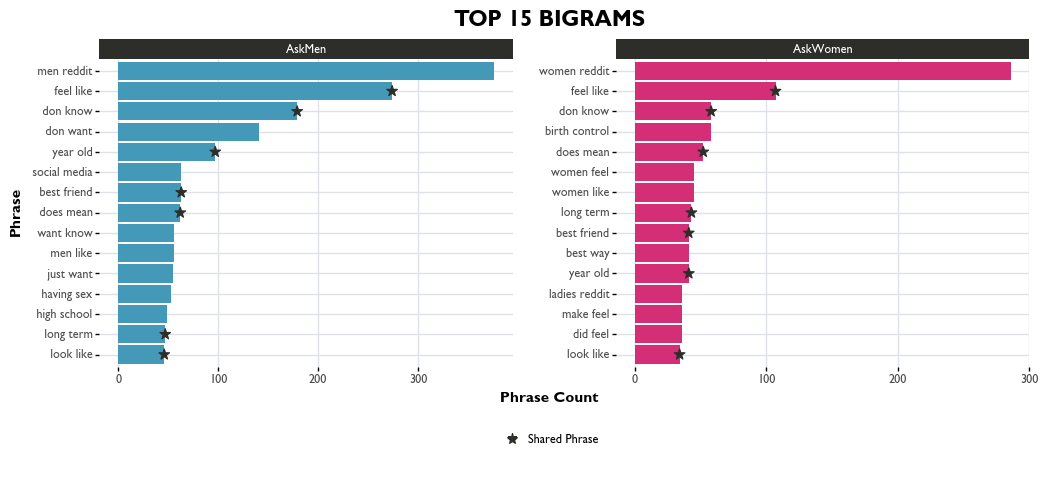

<ggplot: (8772954854723)>

In [165]:
top_bis_plot = (
    ggplot(top_bis, aes(y= "count", x= "reorder(fake_suffix+phrase,count)", fill='subreddit'))
        + geom_bar(stat = "identity")
        + geom_point(data = top_bis[top_bis.shared=="Shared Phrase"], 
                     mapping=aes(y="count", x="fake_suffix+phrase",shape="shared"), 
                     color='#2D2D2A', fill="#2D2D2A",size=4)
        + xlab("Phrase")
        + ylab("Phrase Count")
        + facet_wrap("subreddit", scales="free")
        + scale_x_discrete() 
        + scale_fill_manual(values = [col1,col2], guide=None)
        + scale_shape_manual(values="*", guide = guide_legend(title=""))
        + coord_flip()
        + ggtitle("TOP 15 BIGRAMS")
        + theme(figure_size=(12, 4),
            text = element_text(family="Gill Sans"),
            plot_title=element_text(weight='bold',color='black', size=16),
            panel_background = element_rect(fill="white"),
            panel_grid_major = element_line(color="#dee2e6"),
            legend_position="bottom", legend_box_spacing=.25, legend_key=element_blank(),
            strip_background = element_rect(fill="#2D2D2A"),
            strip_text=element_text(color="white"),
            subplots_adjust={'wspace': 0.25},
            axis_title = element_text(weight='bold'))
          )

ggsave(plot=top_bis_plot, filename='../plots/top_bigrams.png', dpi=1000)


top_bis_plot

In [131]:
df.author_premium.value_counts(normalize=True)

False    0.97525
True     0.02475
Name: author_premium, dtype: float64

In [123]:
df[df.subreddit=='AskWomen'].over_18.value_counts()

False    9527
True      461
Name: over_18, dtype: int64

In [122]:
df[df.subreddit=='AskMen'].over_18.value_counts()

False    9417
True      583
Name: over_18, dtype: int64

In [159]:
[word + ' ' + test[index+1] for index, word in enumerate(test) if index<len(test)-1]

['some question', 'question here', 'here about', 'about sex']